In [45]:
# Import the modules
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
#list all the files from the directory
file_list = [
    'accident.csv',
    'person.csv', 
    'vehicle.csv'
]

file_list

['accident.csv', 'person.csv', 'vehicle.csv']

In [46]:
# Looking at the titles in the accident csv file
accident_data = "./accident.csv"
accidents = pd.read_csv(accident_data)
accidents.columns

Index(['index', 'accident_id', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
       'PERSONS', 'COUNTY', 'county_name', 'CITY', 'city_name', 'DAY', 'MONTH',
       'YEAR', 'HOUR', 'MINUTE', 'NHS', 'FUNC_SYS', 'func_sys_lit', 'ROAD_FNC',
       'road_fnc_lit', 'RD_OWNER', 'rd_owner_lit', 'TWAY_ID', 'TWAY_ID2',
       'LATITUDE', 'LONGITUD', 'SP_JUR', 'sp_jur_lit', 'HARM_EV',
       'harm_ev_lit', 'MAN_COLL', 'man_coll_lit', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'lgt_cond_lit',
       'WEATHER', 'weather_lit', 'SCH_BUS', 'CF1', 'CF2', 'CF3', 'cf1_lit',
       'cf2_lit', 'cf3_lit', 'FATALS', 'A_INTER', 'a_inter_lit', 'A_ROADFC',
       'a_road_fc_lit', 'A_TOD', 'a_tod_lit', 'A_DOW', 'a_dow_lit', 'A_LT',
       'a_lt_lit', 'A_SPCRA', 'a_spcra_lit', 'A_PED', 'a_ped_lit', 'A_PED_F',
       'a_ped_f_lit', 'A_PEDAL', 'a_pedal_lit', 'A_PEDAL_F', 'a_pedal_f_lit',
       'A_POLPUR', 'a_polour_lit', 'A_POSBAC', 'a_posbac_lit', 'A_DIST',
       'a_dist_lit', 'A_DR

In [47]:
# Pulling data from accident csv file: 'accident_id', 'YEAR' 'a_spcra_lit', 'a_posbac_lit , 'a_dist_lit', 'a_drowsy_lit'
# Create DataFrame
speed = accidents[['accident_id', 'YEAR', 'a_spcra_lit']].copy()
# speed filtering out the other crashes
speed = speed[speed['a_spcra_lit'] != "Other Crash"]
speed
# Speeding? A_SPCRA 1 = Speeding, 2 = Not Speeding

,accident_id,YEAR,a_spcra_lit
0,2012040001,2012,Speeding Involved Crash
1,2012040002,2012,Speeding Involved Crash
4,2012040005,2012,Speeding Involved Crash
13,2012040023,2012,Speeding Involved Crash
15,2012040037,2012,Speeding Involved Crash
...,...,...,...
1825,2016040829,2016,Speeding Involved Crash
1828,2016040833,2016,Speeding Involved Crash
1831,2016040836,2016,Speeding Involved Crash
1833,2016040838,2016,Speeding Involved Crash


In [48]:
# Pulling data from accident csv file: 'accident_id', 'YEAR' 'a_spcra_lit', 'a_posbac_lit , 'a_dist_lit', 'a_drowsy_lit'
# Create DataFrame
drunk = accidents[['accident_id', 'YEAR', 'a_posbac_lit']].copy()
drunk
# Drinking?  A_POSBAC 1 = Positive, 2 = Negative, 3 = Unknown 
drunk = drunk[(drunk['a_posbac_lit'] != "All Drivers With ZERO BAC Testing Crash") & 
              (drunk['a_posbac_lit'] != "Unknown BAC Crash")]
drunk

,accident_id,YEAR,a_posbac_lit
0,2012040001,2012,Driver With Positive BAC Testing Crash
1,2012040002,2012,Driver With Positive BAC Testing Crash
10,2012040018,2012,Driver With Positive BAC Testing Crash
18,2012040040,2012,Driver With Positive BAC Testing Crash
19,2012040042,2012,Driver With Positive BAC Testing Crash
...,...,...,...
1832,2016040837,2016,Driver With Positive BAC Testing Crash
1842,2016040853,2016,Driver With Positive BAC Testing Crash
1844,2016040855,2016,Driver With Positive BAC Testing Crash
1850,2016040864,2016,Driver With Positive BAC Testing Crash


In [49]:
# Pulling data from accident csv file: 'accident_id', 'YEAR' 'a_spcra_lit', 'a_posbac_lit , 'a_dist_lit', 'a_drowsy_lit'
# Create DataFrame
distracted = accidents[['accident_id', 'YEAR', 'a_dist_lit']].copy()
distracted = distracted[distracted['a_dist_lit'] != "Other Crash"]
distracted 
# Distraction? A_DIST 1 = Distracted, 2 = Not Distracted 

,accident_id,YEAR,a_dist_lit
11,2012040020,2012,Involving a Distracted Driver
12,2012040022,2012,Involving a Distracted Driver
19,2012040042,2012,Involving a Distracted Driver
29,2012040063,2012,Involving a Distracted Driver
37,2012040082,2012,Involving a Distracted Driver
...,...,...,...
1733,2016040613,2016,Involving a Distracted Driver
1755,2016040661,2016,Involving a Distracted Driver
1780,2016040738,2016,Involving a Distracted Driver
1819,2016040816,2016,Involving a Distracted Driver


In [50]:
# Pulling data from accident csv file: 'accident_id', 'YEAR'  'a_drowsy_lit'
# Create DataFrame
drowsy = accidents[['accident_id', 'YEAR', 'a_drowsy_lit']].copy()
drowsy = drowsy[drowsy['a_drowsy_lit'] != "Other Crash"]
drowsy
# Drowsy? 'a_drowsy_lit' = Drowsy, 2 = Not Drowsy 

,accident_id,YEAR,a_drowsy_lit
19,2012040042,2012,Involving a Drowsy Driver
26,2012040057,2012,Involving a Drowsy Driver
113,2012040242,2012,Involving a Drowsy Driver
145,2012040310,2012,Involving a Drowsy Driver
159,2012040340,2012,Involving a Drowsy Driver
224,2012040469,2012,Involving a Drowsy Driver
346,2012040696,2012,Involving a Drowsy Driver
405,2013040046,2013,Involving a Drowsy Driver
593,2013040414,2013,Involving a Drowsy Driver
760,2013040803,2013,Involving a Drowsy Driver


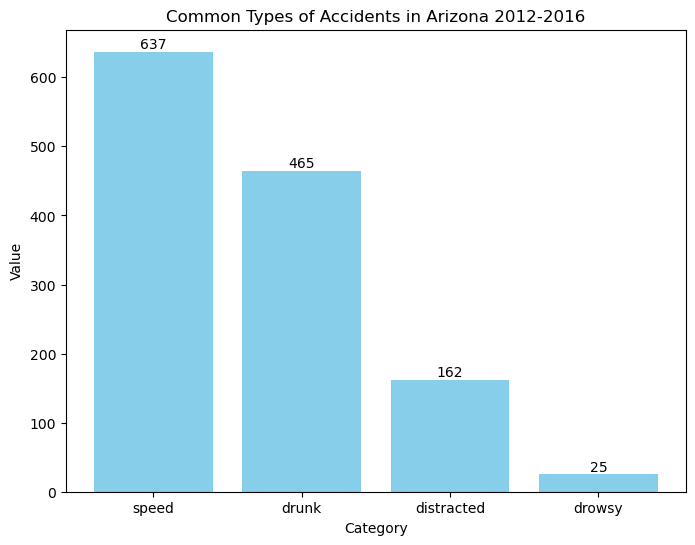

In [72]:
# Data
data = {
    'Category': ['speed', 'drunk', 'distracted', 'drowsy'],
    'Value': [637, 465, 162, 25]
}

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(data['Category'], data['Value'], color='skyblue')

# Add title and labels
plt.title('Common Types of Accidents in Arizona 2012-2016')
plt.xlabel('Category')
plt.ylabel('Value')

# Annotate bars with their values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position
        height,                            # y position (value)
        f'{height}',                       # text to display
        ha='center',                       # horizontal alignment
        va='bottom'                        # vertical alignment
    )

# Show the plot
plt.show()


In [32]:
# Looking at the titles in the person csv file
person_data = "./person.csv"
person = pd.read_csv(person_data)
person.columns

C:\Users\knuck\AppData\Local\Temp\ipykernel_37644\4054873095.py:3: DtypeWarning: Columns (72,73,74,75,82,83,85,89,90,94) have mixed types. Specify dtype option on import or set low_memory=False.
  person = pd.read_csv(person_data)


Index(['index', 'accident_id', 'STATE', 'ST_CASE', 'VE_FORMS', 'VEH_NO',
       'PER_NO', 'STR_VEH', 'COUNTY', 'DAY', 'MONTH', 'HOUR', 'MINUTE',
       'RUR_URB', 'FUNC_SYS', 'HARM_EV', 'MAN_COLL', 'SCH_BUS', 'MAKE',
       'MAK_MOD', 'BODY_TYP', 'MOD_YEAR', 'TOW_VEH', 'SPEC_USE', 'EMER_USE',
       'ROLLOVER', 'IMPACT1', 'FIRE_EXP', 'AGE', 'SEX', 'PER_TYP', 'INJ_SEV',
       'SEAT_POS', 'REST_USE', 'REST_MIS', 'AIR_BAG', 'EJECTION', 'EJ_PATH',
       'EXTRICAT', 'DRINKING', 'ALC_DET', 'ALC_STATUS', 'ATST_TYP', 'ALC_RES',
       'DRUGS', 'DRUG_DET', 'DSTATUS', 'DRUGTST1', 'DRUGTST2', 'DRUGTST3',
       'DRUGRES1', 'DRUGRES2', 'DRUGRES3', 'HOSPITAL', 'DOA', 'DEATH_DA',
       'DEATH_MO', 'DEATH_YR', 'DEATH_HR', 'DEATH_MN', 'DEATH_TM', 'LAG_HRS',
       'LAG_MINS', 'P_SF1', 'P_SF2', 'P_SF3', 'WORK_INJ', 'HISPANIC', 'RACE',
       'LOCATION', 'ROAD_FNC', 'CERT_NO', 'VINTYPE', 'VINMAKE', 'VINA_MOD',
       'VIN_BT', 'VINMODYR', 'VIN_LNGT', 'VIN_WGT', 'WGTCD_TR', 'WHLBS_LG',
       'WHLBS_S

In [96]:
# Pulling data from person csv file: 'accident_id', 'DRUGS', 'DSTATUS', 'DRINKING', 'ALC_STATUS'
accident_types = person[['accident_id', 'DRUGS', 'DSTATUS', 'DRINKING', 'ALC_STATUS']].copy()
accident_types
# DRUGS 0 = , 1 = , 8 = , 9 =
# DRINKING 0 = , 1 = , 8 = , 9 =

,accident_id,DRUGS,DSTATUS,DRINKING,ALC_STATUS
0,2016040001,0,8,1,2
1,2016040001,8,0,8,0
2,2016040001,8,0,8,0
3,2016040001,8,0,8,0
4,2016040001,8,0,8,0
...,...,...,...,...,...
10606,2012040752,8,0,8,0
10607,2012040753,9,9,9,9
10608,2012040753,8,0,8,0
10609,2012040754,9,9,9,9


In [34]:
accident_types['DRUGS'].value_counts()[0:10]

DRUGS
0    4451
8    3769
9    2079
1     312
Name: count, dtype: int64

In [35]:
accident_types['DRINKING'].value_counts()[0:10]

DRINKING
0    3958
8    3618
9    2060
1     975
Name: count, dtype: int64

In [53]:
accident_types['VINMAKE'].value_counts()[0:10]

VINMAKE
CHEV    303
FORD    272
DODG    154
TOYT    150
HOND    110
NISS     95
HD       71
GMC      57
JEEP     51
BUIC     36
Name: count, dtype: int64

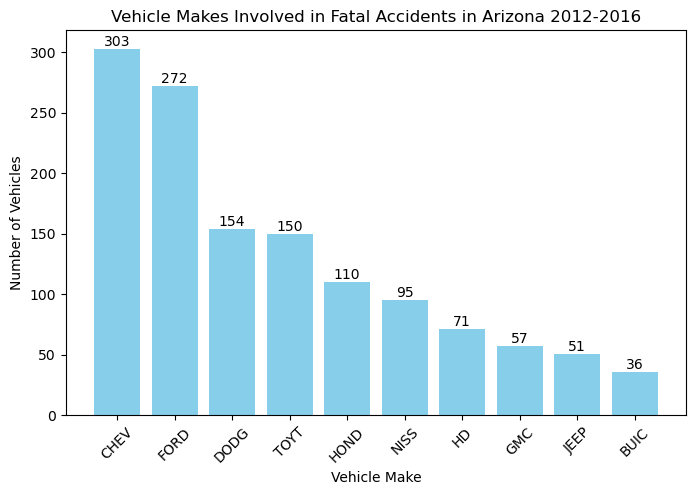

In [74]:
import matplotlib.pyplot as plt

# Data
data = {
    'VINMAKE': ['CHEV', 'FORD', 'DODG', 'TOYT', 'HOND', 'NISS', 'HD', 'GMC', 'JEEP', 'BUIC'],
    'Value': [303, 272, 154, 150, 110, 95, 71, 57, 51, 36]
}

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(data['VINMAKE'], data['Value'], color='skyblue')

# Add title and labels
plt.title('Vehicle Makes Involved in Fatal Accidents in Arizona 2012-2016')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Vehicles')

# Annotate bars with their values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position (center of the bar)
        height,                            # y position (top of the bar)
        f'{height}',                       # text to display
        ha='center',                       # horizontal alignment
        va='bottom'                        # vertical alignment
    )

# Rotate x labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()
